In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{amsmath}',
    "font.family": "Times New Roman"
})

# **The solution of Homogenous Systems is the subspace of $\mathbb{R}^n$**

## Paremetric Equation

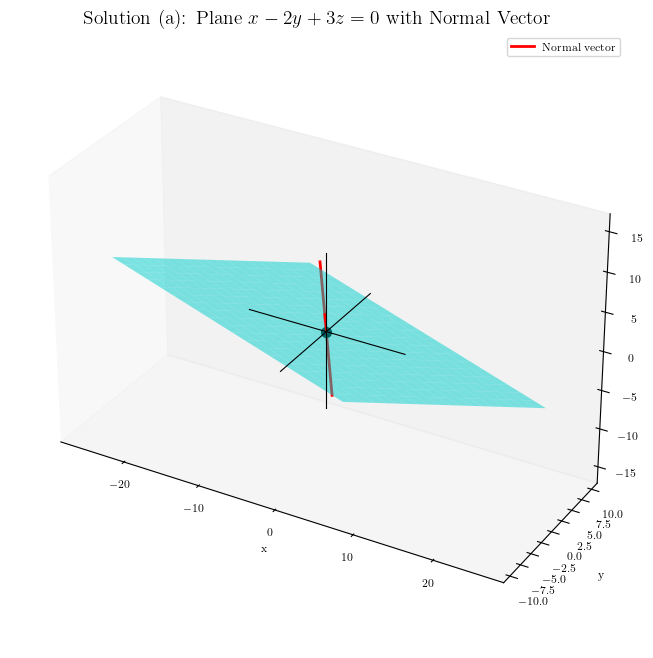

In [8]:
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

anchor = 10
ax.plot([-anchor, anchor], [0, 0], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor]          , color="black", linestyle="solid", linewidth=0.8, zorder=10)       # Z-axis

# Define grid for plane
y = np.linspace(-5, 5, 20)
z = np.linspace(-5, 5, 20)
Y, Z = np.meshgrid(y, z)
X = 2*Y - 3*Z  # plane equation: x = 2y - 3z

# Plot plane
ax.plot_surface(X, Y, Z, alpha=0.5, color='cyan', rstride=1, cstride=1, edgecolor='none')

# Normal vector (1, -2, 3)
n = np.array([1, -2, 3])
t = np.linspace(-5, 5, 10)
normal_line = np.outer(t, n)

# Plot normal line through origin
ax.plot(normal_line[:,0], normal_line[:,1], normal_line[:,2], color='red', linewidth=2, label="Normal vector")
ax.quiver(0, 0, 0, n[0], n[1], n[2], color='red', length=5, normalize=True)

# Origin
ax.scatter(0, 0, 0, color='black', s=50)

# Labels and title
ax.set_title("Solution (a): Plane $x - 2y + 3z = 0$ with Normal Vector", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_aspect('equal')
ax.grid(False)
ax.legend()

plt.show()

# **Spanning Set**

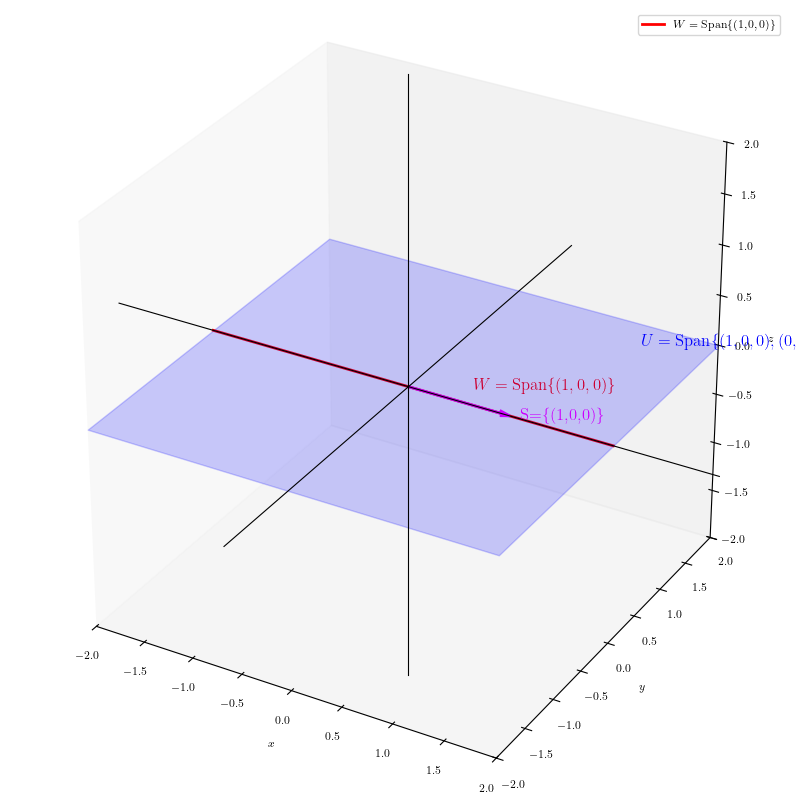

In [12]:

FONTSIZE = 12
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

DEFAULT_POS = 5
MAX_X_POS = DEFAULT_POS
MAX_Y_POS = DEFAULT_POS
MAX_Z_POS = DEFAULT_POS

DEFAULT_NEG = -5
MAX_X_NEG = DEFAULT_NEG
MAX_Y_NEG = DEFAULT_NEG
MAX_Z_NEG = DEFAULT_NEG

ax.set_xlim(MAX_X_NEG, MAX_X_POS)
ax.set_ylim(MAX_Y_NEG, MAX_Y_POS)
ax.set_zlim(MAX_Z_NEG, MAX_Z_POS)

# Cartesian coordinate axes
anchor = 3
ax.plot([-anchor, anchor], [0, 0], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor]          , color="black", linestyle="solid", linewidth=0.8, zorder=10)       # Z-axis



# --- W (span of (1,0,0)) as x-axis line ---
t = np.linspace(-2, 2, 20)
ax.plot(t, np.zeros_like(t), np.zeros_like(t), color="red", linewidth=2, label=r"$W=\text{Span}\{(1,0,0)\}$")
ax.text(0.5, 0.25, 0, r"$W=\text{Span}\{(1,0,0)\}$", color="red", fontsize=FONTSIZE)
# --- U (span of (1,0,0),(0,1,0)) as xy-plane patch ---
plane_size = 2
verts = [[
    (-plane_size, -plane_size, 0),
    (-plane_size,  plane_size, 0),
    ( plane_size,  plane_size, 0),
    ( plane_size, -plane_size, 0)
]]
plane = Poly3DCollection(verts, alpha=0.2, color="blue")
ax.add_collection3d(plane)

ax.text(1.5, 1.5, 0.1, r"$U=\text{Span}\{(1,0,0),(0,1,0)\}$", color="blue", fontsize=FONTSIZE)

# --- Basis vector (1,0,0) from S ---
ax.quiver(0, 0, 0, 1, 0, 0, color="magenta", arrow_length_ratio=0.1, linewidth=2)
ax.text(1.1, 0, 0, r"S=\{(1,0,0)\}", color="magenta", fontsize=FONTSIZE)

# Axes labels
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

# Set limits
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

ax.set_aspect('equal')
ax.grid(False)
plt.tight_layout()
plt.show()


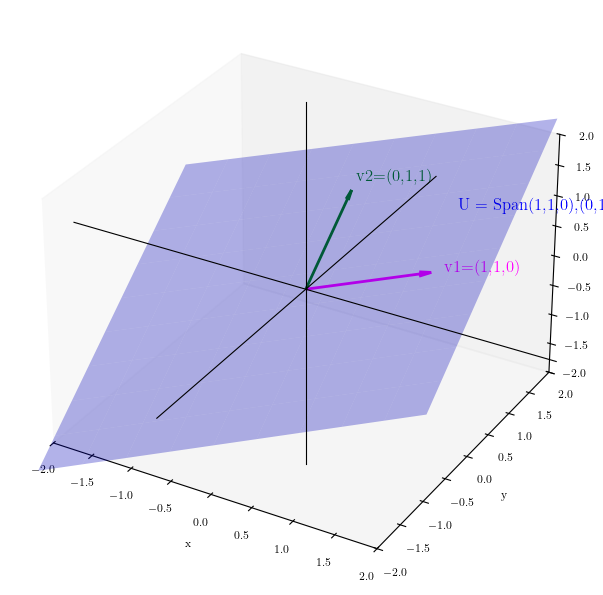

In [14]:
FONTSIZE = 12

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

anchor = 3
ax.plot([-anchor, anchor], [0, 0], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor]          , color="black", linestyle="solid", linewidth=0.8, zorder=10)       # Z-axis


# --- Define basis vectors ---
v1 = np.array([1,1,0])
v2 = np.array([0,1,1])

# --- Create a mesh grid for the span plane ---
a = np.linspace(-1.5, 1.5, 10)
b = np.linspace(-1.5, 1.5, 10)
A, B = np.meshgrid(a, b)
X = A*v1[0] + B*v2[0]
Y = A*v1[1] + B*v2[1]
Z = A*v1[2] + B*v2[2]

ax.plot_surface(X, Y, Z, alpha=0.3, color="blue")

# --- Plot vectors ---
ax.quiver(0, 0, 0, *v1, color="magenta", arrow_length_ratio=0.1, linewidth=2)
ax.text(*v1*1.1, "v1=(1,1,0)", color="magenta", fontsize=FONTSIZE)

ax.quiver(0, 0, 0, *v2, color="green", arrow_length_ratio=0.1, linewidth=2)
ax.text(*v2*1.1, "v2=(0,1,1)", color="green", fontsize=FONTSIZE)

# --- Label for the span ---
ax.text(1.2, 1.2, 1.0, "U = Span{(1,1,0),(0,1,1)}", color="blue", fontsize=FONTSIZE)

# Axes labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Set limits
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

ax.set_aspect('equal')
ax.grid(False)
plt.tight_layout()
plt.show()

# **Linear Combinations solutions**

## Unique Solution

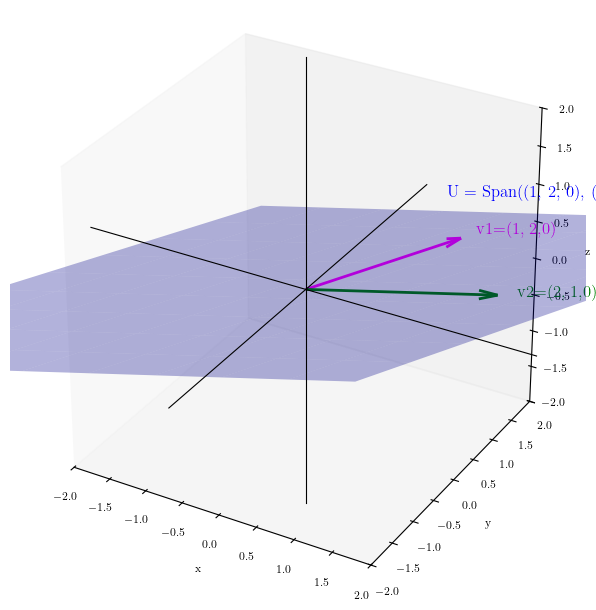

In [21]:

FONTSIZE = 12

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

anchor = 3
ax.plot([-anchor, anchor], [0, 0], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor]          , color="black", linestyle="solid", linewidth=0.8, zorder=10)       # Z-axis


# --- Define basis vectors ---
v1 = np.array([1,2,0])
v2 = np.array([2,1,0])

# --- Create a mesh grid for the span plane ---
a = np.linspace(-1.5, 1.5, 10)
b = np.linspace(-1.5, 1.5, 10)
A, B = np.meshgrid(a, b)
X = A*v1[0] + B*v2[0]
Y = A*v1[1] + B*v2[1]
Z = A*v1[2] + B*v2[2]

ax.plot_surface(X, Y, Z, alpha=0.3, color="blue")

# --- Plot vectors ---
ax.quiver(0, 0, 0, *v1, color="magenta", arrow_length_ratio=0.1, linewidth=2)
ax.text(*v1*1.1, rf"v1=({v1[0]}, {v1[1]},0)", color="magenta", fontsize=FONTSIZE)

ax.quiver(0, 0, 0, *v2, color="green", arrow_length_ratio=0.1, linewidth=2)
ax.text(*v2*1.1, rf"v2=({v2[0]}, {v2[1]},0)", color="green", fontsize=FONTSIZE)

# --- Label for the span ---
ax.text(1.2, 1.2, 1.0, f"U = Span{(v1[0], v1[1], v1[2]),(v2[0], v2[1], v2[2])}", color="blue", fontsize=FONTSIZE)


# Axes labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Set limits
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

ax.set_aspect('equal')
ax.grid(False)
plt.tight_layout()
plt.show()

## Infinte many Solution

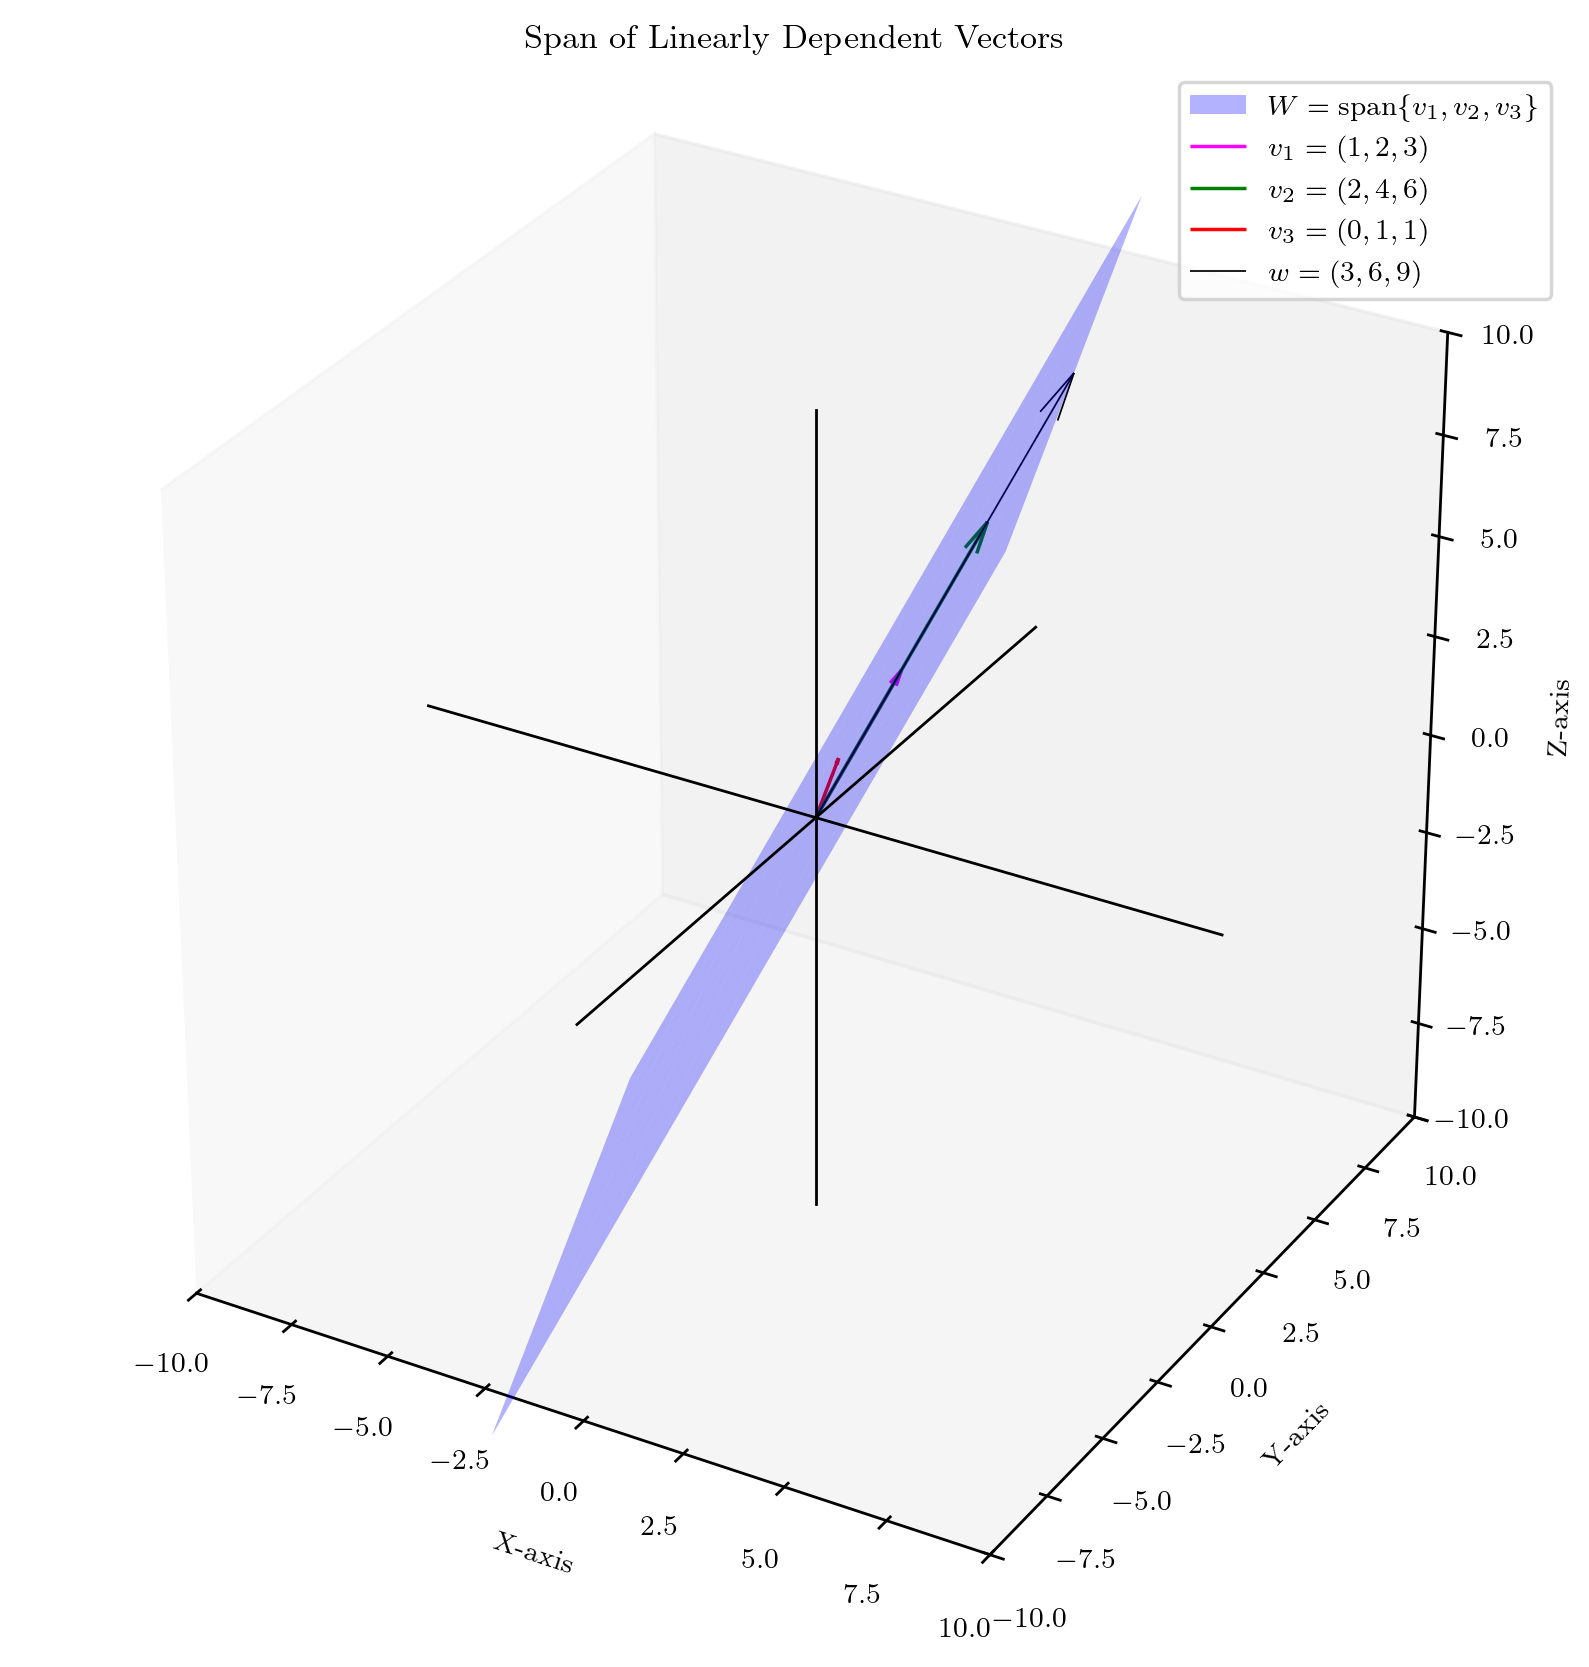

In [38]:

fig = plt.figure(figsize=(8, 8), dpi=250)
ax = fig.add_subplot(111, projection='3d')

anchor = 10
ax.plot([-anchor, anchor], [0, 0], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=10)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor]          , color="black", linestyle="solid", linewidth=0.8, zorder=10)       # Z-axis

## FIX: Use the correct vectors from the slide's example
v1 = np.array([1, 2, 3])
v2 = np.array([2, 4, 6])  # Note: v2 is 2*v1
v3 = np.array([0, 1, 1])
w = np.array([3, 6, 9])   # The target vector

## FIX: Create a 2D plane using the two independent vectors (v1 and v3)
# We only need two parameters (a, b) for a 2D plane
a = np.linspace(-3, 3, 10)
b = np.linspace(-3, 3, 10)
A, B = np.meshgrid(a, b)
A, C = np.meshgrid(a, b)
X = A*v1[0] + B*v3[0]
Y = A*v1[1] + B*v3[1]
Z = A*v1[2] + B*v3[2]

# Plot the plane spanned by v1 and v3
ax.plot_surface(X, Y, Z, alpha=0.3, color="blue", label=r"$W=\operatorname{span}\{v_1, v_2, v_3\}$")

# --- Plot vectors ---
ax.quiver(0, 0, 0, *v1, color="magenta", arrow_length_ratio=0.1, linewidth=1, label=r'$v_1=(1,2,3)$', zorder=4)
ax.quiver(0, 0, 0, *v2, color="green", arrow_length_ratio=0.1, linewidth=1, label=r'$v_2=(2,4,6)$', zorder=3)
ax.quiver(0, 0, 0, *v3, color="red", arrow_length_ratio=0.1, linewidth=1, label=r'$v_3=(0,1,1)$', zorder=2)
ax.quiver(0, 0, 0, *w, color="k", arrow_length_ratio=0.1, linewidth=0.5, label=r'$w=(3,6,9)$', zorder=1)

## FIX: Adjust axis limits to see all vectors
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# Axes labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.set_aspect('equal')
ax.grid(False)
ax.legend()
plt.title("Span of Linearly Dependent Vectors")
plt.show()

## Inconsistent Solution

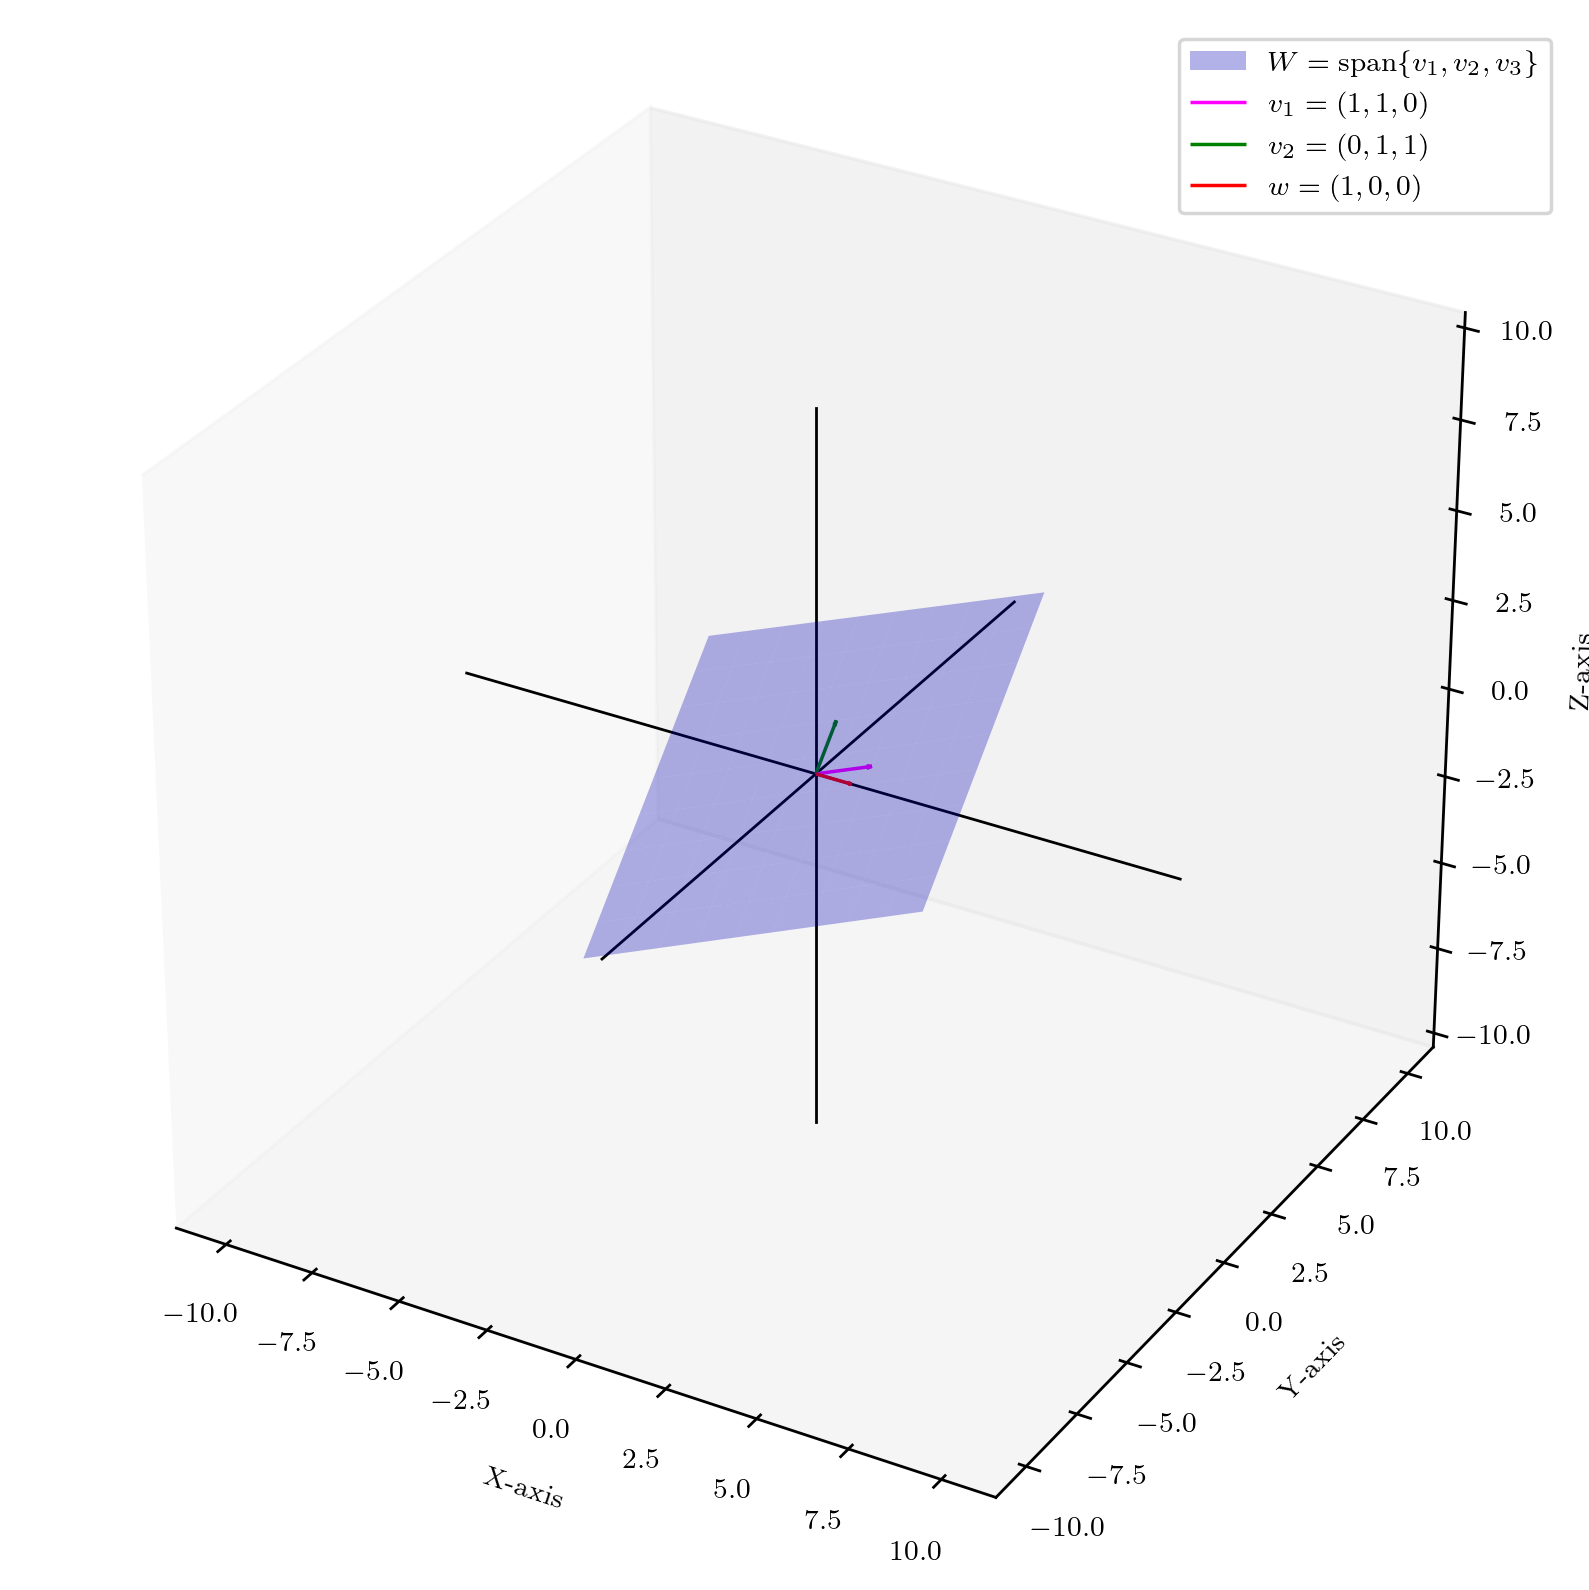

In [40]:

fig = plt.figure(figsize=(8, 8), dpi=250)
ax = fig.add_subplot(111, projection='3d')

anchor = 10
ax.plot([-anchor, anchor], [0, 0], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=1)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0]  , color="black", linestyle="solid", linewidth=0.8, zorder=1)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor]          , color="black", linestyle="solid", linewidth=0.8, zorder=1)       # Z-axis

## FIX: Use the correct vectors from the slide's example
v1 = np.array([1, 1, 0])
v2 = np.array([0, 1, 1])  # Note: v2 is 2*v1
w = np.array([1, 0, 0])

## FIX: Create a 2D plane using the two independent vectors (v1 and v3)
# We only need two parameters (a, b) for a 2D plane
a = np.linspace(-3, 3, 10)
b = np.linspace(-3, 3, 10)
A, B = np.meshgrid(a, b)
A, C = np.meshgrid(a, b)
X = A*v1[0] + B*v2[0]
Y = A*v1[1] + B*v2[1]
Z = A*v1[2] + B*v2[2]

# Plot the plane spanned by v1 and v3
ax.plot_surface(X, Y, Z, alpha=0.3, color="blue", label=r"$W=\operatorname{span}\{v_1, v_2, v_3\}$")

# --- Plot vectors ---
ax.quiver(0, 0, 0, *v1, color="magenta", arrow_length_ratio=0.1, linewidth=1, label=rf'$v_1=({v1[0]}, {v1[1]}, {v1[2]})$', zorder=4)
ax.quiver(0, 0, 0, *v2, color="green", arrow_length_ratio=0.1, linewidth=1, label=rf'$v_2=({v2[0]}, {v2[1]}, {v2[2]})$', zorder=3)
ax.quiver(0, 0, 0, *w, color="red", arrow_length_ratio=0.1, linewidth=1, label=rf'$w=({w[0]}, {w[1]}, {w[2]})$', zorder=2)


# Axes labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.set_aspect('equal')
ax.grid(False)
ax.legend()
plt.show()